In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.applications.vgg19 import VGG19, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import cv2
from keras_preprocessing.image import ImageDataGenerator

# from tensorflow.keras.layers import *
# from tensorflow.keras.models import *
# from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import categorical_crossentropy
from progressbar import ProgressBar
import os

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# pbar = ProgressBar()
# for i in pbar(range(len(X_train))):
#     X_train[i]=X_train[i]/255.0
# pbar = ProgressBar()
# for i in pbar(range(len(X_test))):
#     X_test[i]=X_test[i]/255.0
    
# pbar = ProgressBar()
# tmp_train = [cv2.resize(i,(224,224)) for i in pbar(X_train)]
# pbar = ProgressBar()
# tmp_test = [cv2.resize(i,(224,224)) for i in pbar(X_test)]

# DATA_PATH = "/public/liujiawei/huawei/ZHB/ADF-master/datasets/"
# X_train = np.load(DATA_PATH + "CIFAR10_Xtrain_224.npy")
# X_test = np.load(DATA_PATH + "CIFAR10_Xtest_224.npy")
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print(X_train.shape)
print(Y_train.shape)

# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

(50000, 32, 32, 3)
(50000, 10)


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "4"
config=tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True   #不全部占满显存, 按需分配
sess=tf.compat.v1.Session(config=config) 

# myInput = tf.placeholder(shape=(None,32,32,3), dtype=tf.float32)
# model = VGG19(input_tensor=myInput, classes=10, include_top=False, weights=None)
# del model
model = VGG19(input_shape=(32,32,3), classes=10, weights=None)
# model.summary()


MODEL_PATH = "/public/liujiawei/huawei/ZHB/ADF-master/models/"
model = load_model(MODEL_PATH+"cifar10_VGG19.h5")

optimizers = tf.keras.optimizers.Adam(lr=0.0000001)
model.compile(optimizer=optimizers, loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=MODEL_PATH+"cifar10_VGG19.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode = 'max')
callbacks_list = [checkpoint]
model.fit(X_train, Y_train, epochs=500, batch_size=256, shuffle=True, 
          validation_data=(X_test[0:5000], Y_test[0:5000]), callbacks=callbacks_list)

# model.save(MODEL_PATH+"cifar10_VGG19.h5")
# del model

Epoch 1/500
171/196 [=========================>....] - ETA: 1s - loss: 9.0129e-05 - accuracy: 1.0000

KeyboardInterrupt: 

In [3]:
pbar = ProgressBar()
tmp_train = [cv2.resize(i,(224,224)) for i in pbar(X_train)]
pbar = ProgressBar()
tmp_test = [cv2.resize(i,(224,224)) for i in pbar(X_test)]
## 重新转回为 array
# tmp_train = np.array(tmp_train)
# tmp_test = np.array(tmp_test)

100% |########################################################################|
100% |########################################################################|


In [13]:
print(len(tmp_train))
print(np.shape(tmp_train[0:2]))

50000
(2, 224, 224, 3)


In [42]:
img_path = 'elephant.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
y1 = base_model.predict(np.reshape(img, [-1,224,224,3]))
print(np.argmax(y1))

649


In [57]:
print('Predicted:', decode_predictions(y1, top=10)[0][5][0])

Predicted: n02963159


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


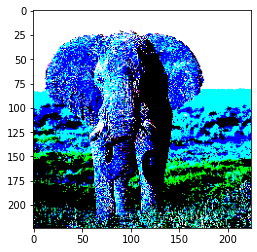

In [27]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(111)
plt.imshow(np.reshape(x, [224,224,3]))

In [23]:
tmp1 = np.mean(block4_pool_features, axis = 0)
tmp2 = np.mean(tmp1, axis = 2)
print(np.shape(tmp2))

(56, 56)


In [26]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
np.shape(Y_test)

(10000, 1)

Train on 60000 samples
60000/60000 [==============================] - 1s 23us/sample - loss: 1.4574 - acc: 0.6588


In [39]:
MODEL_PATH = "/public/liujiawei/huawei/ZHB/ADF-master/models/"
model = load_model(MODEL_PATH+"cifar_FC4_bad.h5")

In [40]:
loss_acc = model.evaluate(X_test, Y_test, batch_size=128)
print('accuracy', loss_acc[-1])

10000/10000 [==============================] - 0s 36us/sample - loss: 0.8338 - acc: 0.8262
accuracy 0.8262


In [41]:
Gini = []
index1 = 0
index2 = 0
for x_tmp in X_test:
    per_tmp = model.predict(x_tmp.reshape([-1,28*28]))
    label_tmp = np.argmax(per_tmp)
    if label_tmp == np.argmax(Y_test[index1]):
        index2 = index2 +1
    index1 = index1 + 1
    Gini_tmp = 1-np.sum(per_tmp*per_tmp)
    Gini.append(Gini_tmp)

In [42]:
print('test number:', index1, '\t misclassified number:', index1-index2)

test number: 10000 	 misclassified number: 1738


In [43]:
indexs = np.argsort(Gini)
indexs = indexs[::-1]

In [44]:
o_i = 0
for i in range(0, (index1-index2)):
    x_tmp = X_test[indexs[i]].reshape([-1,28*28])
    y_tmp = Y_test[indexs[i]]
    per_tmp = model.predict(x_tmp)
    if np.argmax(y_tmp)!=np.argmax(per_tmp):
        o_i = o_i+i
APFD = 1-o_i/(index1*(index1-index2))+1/(2*index1)
print(APFD)

0.9616434982738781


In [45]:
def softmax( f ):
    # instead: first shift the values of f so that the highest number is 0:
    f -= np.max(f) # f becomes [-666, -333, 0]
    return np.exp(f) / np.sum(np.exp(f))  # safe to do, gives the correct answer
    
from tensorflow.keras import backend as BE
import tensorflow as tf

get_activations = BE.function(inputs=model.inputs[0], outputs=model.layers[-2].output[:,:])

Gini_act = []
for x_tmp in X_test:
    x_act = get_activations(x_tmp.reshape([-1,28*28]))
    Gini_tmp = 1-np.sum(x_act*x_act)
    Gini_act.append(Gini_tmp)


In [46]:
indexs = np.argsort(Gini_act)
indexs = indexs[::-1]
o_i = 0
for i in range(0, (index1-index2)):
    x_tmp = X_test[indexs[i]].reshape([-1,28*28])
    y_tmp = Y_test[indexs[i]]
    per_tmp = model.predict(x_tmp)
    if np.argmax(y_tmp)!=np.argmax(per_tmp):
        o_i = o_i+i
APFD = 1-o_i/(index1*(index1-index2))+1/(2*index1)
print(APFD)

0.9795638665132336
